# Analysis of factors affecting the repayment of the loan.
            
## Contents:
### [1. Description of the data](#description)  
### [2. General data information](#task1)  
### [3. Dataset preparation for analysis](#task2) 
### [4. EDA](#task3)  
#### [4.1 Gender](#task3.1)  
#### [4.2 Married](#task3.2)  
#### [4.3 Dependents](#task3.3)  
#### [4.4 Education](#task3.4)
#### [4.5 Self-Employed](#task3.5)
#### [4.6 Income](#task3.6)  
#### [4.7 LoanAmount](#task3.7)    
#### [4.8 Loan_Amount_Term](#task3.8)  
#### [4.9 Credit_History](#task3.9)  
#### [4.10 Property_Area](#task3.10)
#### [4.11 Tests](#task3.11)
### [5. Preprocessing](#task4)  
### [6. Model](#task5)  
### [7. Conclusions](#task6)  

<a id='description'></a>

### 1. Description of the data

<img src="data.JPG" width="500" height="200">

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid", palette="rocket")
import matplotlib.pyplot as plt
import scipy.stats as stat
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

<a id='task1'></a>

### 2. General data information

In [3]:
df = pd.read_csv("loan_data_set.csv")

In [4]:
df.shape

(614, 13)

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**There are gaps in the dataset. Let's estimate their quantity:**

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Let's check if there are any duplicates:**

In [8]:
df.duplicated().sum()

0

<a id='task2'></a>

### 3. Dataset preparation for analysis

**Remove data that is irrelevant for analysis - Loan_ID**

In [9]:
df.drop('Loan_ID', axis=1, inplace=True)

**Let's fill in the missing values in columns with a categorical data type with the values ​​of the most common - mode**

In [10]:
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])

**Although Credit_History is not categorical, it essentially takes values of 1 and 0, so the missing values can also be filled in with a mode.**

In [11]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

**The same is true for Loan_Amount_Term, because has a limited number of accepted values, therefore, it would also be logical to fill it with a mode.**

In [12]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [13]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

**Before filling LoanAmount, we need to understand if there are outliers.**

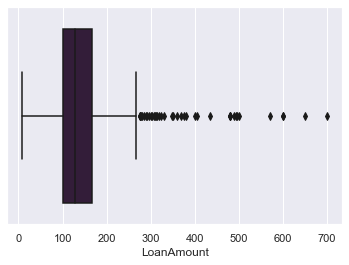

In [14]:
sns.boxplot(x="LoanAmount", data=df);

**Since there are outliers, fill the empty values with the median**

In [15]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [16]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**So there are no empty values**

<a id='task3'></a>

### 4. EDA

**Loan Status - target variable (takes the values Y - if the loan is approved and N if it is rejected)**

In [17]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

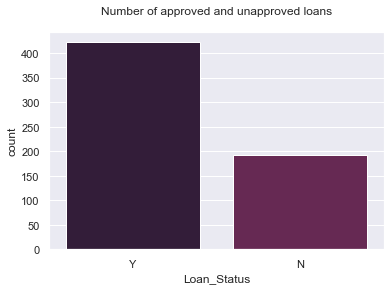

In [18]:
sns.countplot(df["Loan_Status"]).set_title("Number of approved and unapproved loans\n");

In [19]:
pd.DataFrame(df["Loan_Status"].value_counts(normalize=True))

,Loan_Status
Y,0.687296
N,0.312704


**Approximately 69% of loans approved**

To calculate the success rate of obtaining a loan, let's add one more feature - recode Loan_Status into the values 1 and 0.

In [20]:
df['Loan_Status_bin'] = df['Loan_Status'].replace({'N':0, 'Y':1})

<a id='task3.1'></a>

**Gender (Male/Female)**

**Evaluate the influence of the Gender feature on the target variable**

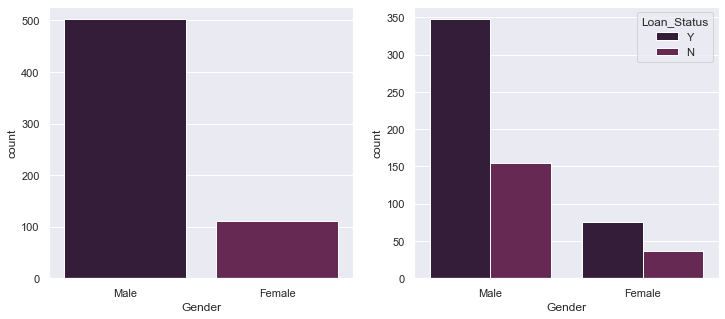

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(df["Gender"], ax=ax[0])
sns.countplot(df["Gender"], hue=df["Loan_Status"], ax=ax[1]);

In [22]:
pd.DataFrame(round(df['Gender'].value_counts(normalize=True)*100))

,Gender
Male,82.0
Female,18.0


In [23]:
df.groupby(['Gender'])[['Loan_Status_bin']].agg(['count','mean'])

Loan_Status_bin          
                 count      mean
Gender                          
Female             112  0.669643
Male               502  0.691235

In [24]:
pd.DataFrame(df.groupby(by="Gender")["Loan_Status"].value_counts())

Loan_Status
Gender Loan_Status             
Female Y                     75
       N                     37
Male   Y                    347
       N                    155

**Conclusions:**  
1. 502 applicants - 82% are men and 112 - 18% women
2. 75 women - 67% and 347 men - 69% received a loan
3. The difference is only 2%, which means that the influence of this factor on the target variable is insignificant.

<a id='task3.2'></a>

**Married (No/Yes)**

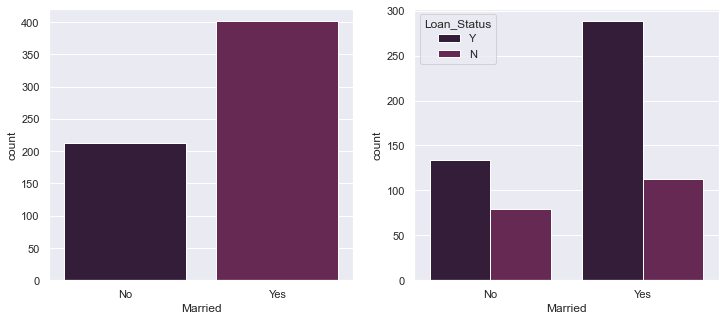

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(df['Married'], ax=ax[0])
sns.countplot(df['Married'], hue=df['Loan_Status'], ax=ax[1]);

In [26]:
pd.DataFrame(round(df['Married'].value_counts(normalize=True)*100))

,Married
Yes,65.0
No,35.0


In [27]:
df.groupby(['Married'])[['Loan_Status_bin']].agg(['count','mean'])

Loan_Status_bin          
                  count      mean
Married                          
No                  213  0.629108
Yes                 401  0.718204

In [28]:
pd.DataFrame(df.groupby(by="Married")["Loan_Status"].value_counts())

Loan_Status
Married Loan_Status             
No      Y                    134
        N                     79
Yes     Y                    288
        N                    113

**Conclusions:**  
1. 401 applicants - 65% married and 213 - 35% single
2. 288 married applicants - 72% and 134 unmarried applicants - 63% received a loan
3. The difference is already 9%, which indicates that the influence of this factor on the target variable is higher than that of the previous one, so the chance of getting a loan is 9% higher if the applicant is married.

<a id='task3.3'></a>

**Dependents (0,1,2 or 3+)**

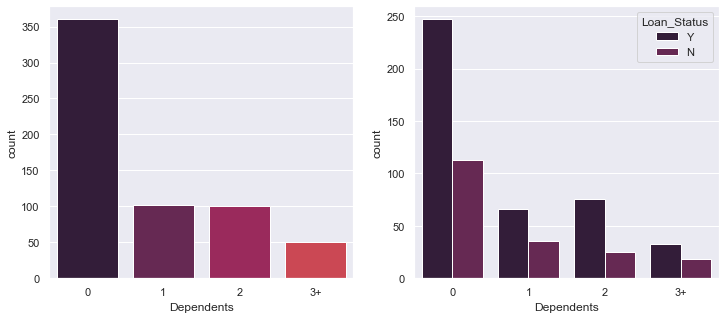

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(df['Dependents'], ax=ax[0])
sns.countplot(df['Dependents'], hue=df['Loan_Status'], ax=ax[1]);

In [30]:
pd.DataFrame(round(df['Dependents'].value_counts(normalize=True)*100))

,Dependents
0,59.0
1,17.0
2,16.0
3+,8.0


In [31]:
df.groupby(['Dependents'])[['Loan_Status_bin']].agg(['count','mean'])

Loan_Status_bin          
                     count      mean
Dependents                          
0                      360  0.686111
1                      102  0.647059
2                      101  0.752475
3+                      51  0.647059

In [32]:
pd.DataFrame(df.groupby(['Dependents'])['Loan_Status'].value_counts())

Loan_Status
Dependents Loan_Status             
0          Y                    247
           N                    113
1          Y                     66
           N                     36
2          Y                     76
           N                     25
3+         Y                     33
           N                     18

In [33]:
pd.DataFrame(df.groupby(['Dependents'])['Married'].value_counts(normalize=True))

Married
Dependents Married          
0          Yes      0.513889
           No       0.486111
1          Yes      0.774510
           No       0.225490
2          Yes      0.920792
           No       0.079208
3+         Yes      0.862745
           No       0.137255

**Conclusions:**  
1. 360 applicants - 59% do not have dependents, 102 - 17% - one, 101 - 16% - two and 51 - 8% three or more.
2. 247 people without dependents - 68%, 66 people. with 1 - 65%, 76 people with two dependents - 75% and 33 people. with 3+ - 65% received a loan.
3. Here you can see that in the group of people with two dependents, the percentage of success in obtaining loans is 75%, which is on average 10% higher than in other groups, but this is the influence of another factor discussed above - marriage status. Thus, in the category of applicants with two dependents, the highest % of those who are married is 92% compared to other groups (51%, 77% and 86%).
4. By itself, this factor does not significantly affect the target variable.

<a id='task3.4'></a>

**Education - (Graduate/Not Graduate)**

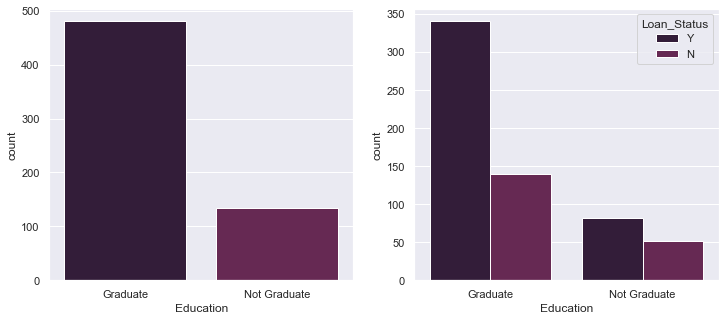

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(df['Education'], ax=ax[0])
sns.countplot(df['Education'], hue=df['Loan_Status'], ax=ax[1]);

In [35]:
pd.DataFrame(round(df['Education'].value_counts(normalize=True)*100))

,Education
Graduate,78.0
Not Graduate,22.0


In [36]:
df.groupby(['Education'])[['Loan_Status_bin']].agg(['count','mean'])

Loan_Status_bin          
                       count      mean
Education                             
Graduate                 480  0.708333
Not Graduate             134  0.611940

In [37]:
pd.DataFrame(df.groupby(['Education'])["Loan_Status"].value_counts())

Loan_Status
Education    Loan_Status             
Graduate     Y                    340
             N                    140
Not Graduate Y                     82
             N                     52

**Conclusions:**  
1. 480 applicants - 78% have higher education and 134 - 22% do not
2. 340 applicants with education - 71% and 82 applicants without - 61% received a loan
3. The difference is 10%, which indicates that there is a small effect of this factor on the target variable, so the chance of getting a loan is 10% higher if the applicant has a higher education.

<a id='task3.5'></a>

**Self Employed (No/Yes)**

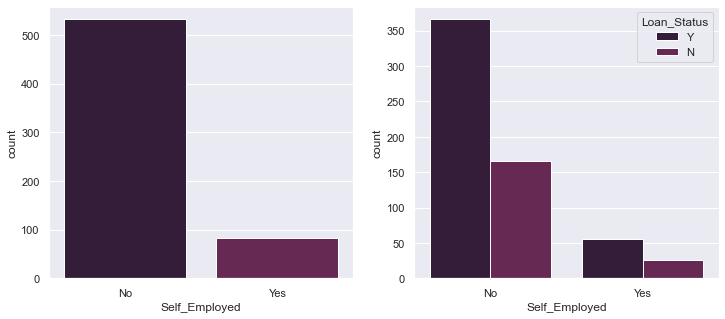

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(df['Self_Employed'], ax=ax[0])
sns.countplot(df['Self_Employed'], hue=df['Loan_Status'], ax=ax[1]);

In [39]:
pd.DataFrame(round(df['Self_Employed'].value_counts(normalize=True)*100))

,Self_Employed
No,87.0
Yes,13.0


In [40]:
df.groupby(['Self_Employed'])[['Loan_Status_bin']].agg(['count','mean'])

Loan_Status_bin          
                        count      mean
Self_Employed                          
No                        532  0.687970
Yes                        82  0.682927

In [41]:
pd.DataFrame(df.groupby(['Self_Employed'])["Loan_Status"].value_counts())

Loan_Status
Self_Employed Loan_Status             
No            Y                    366
              N                    166
Yes           Y                     56
              N                     26

**Conclusions:**  
1. 532 applicants - 87% are not self-employed and only 82 people. - 13% are.
2. 366 people who are not self-employed - 69% and 56 applicants who are - 68% received a loan.
3. The difference is less than 1%, which means that this factor does not affect the target variable.

<a id='task3.6'></a>

**Applicant Income**

In [42]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

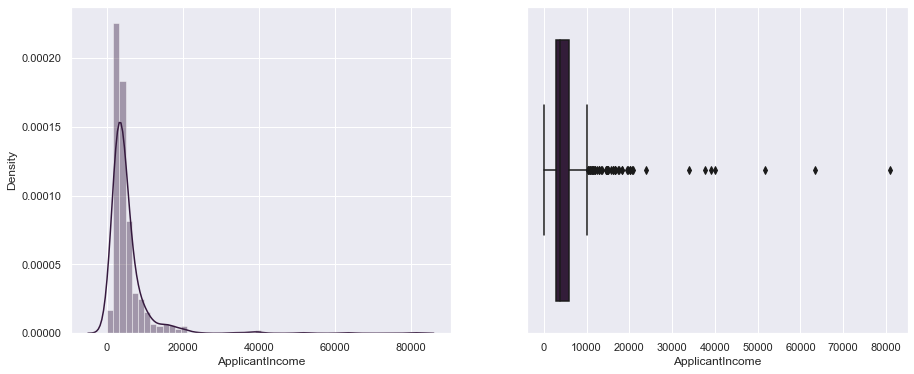

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.distplot(df['ApplicantIncome'], bins=50, ax=ax[0])
sns.boxplot(df['ApplicantIncome'], ax=ax[1]);

**There are problems with the distribution, so when preparing the data for modeling, it will be necessary to transform the data using a logarithm**

**Let's study the data in the segment, where ApplicantIncome > 30000**

In [44]:
df_ai = df[df['ApplicantIncome'] > 30000]
df_ai

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_bin
155,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y,1
171,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y,1
183,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N,0
185,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y,1
333,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y,1
409,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N,0
443,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y,1


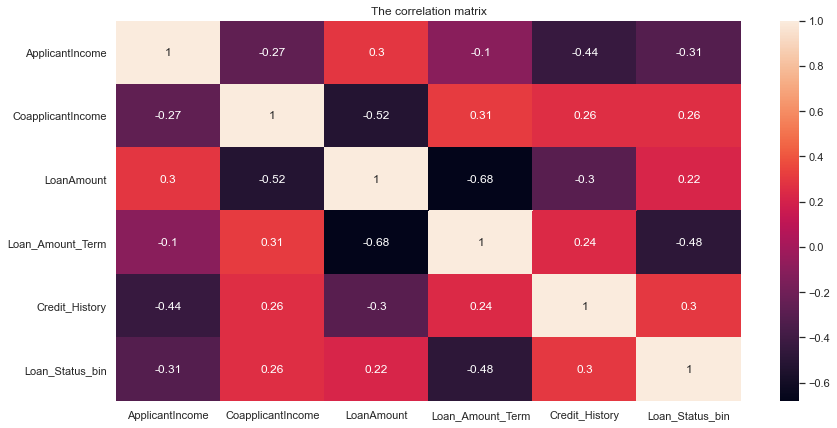

In [45]:
plt.figure(figsize=(14,7))
sns.heatmap(df_ai.corr(),annot=True)
plt.title('The correlation matrix');

**In this data segment, Loan_Amount_Term correlates the most with the target variable. For example, an applicant with an income of 39999 asks for a loan for 180 months in the amount of 600 thousand and receives it, while an applicant with a higher income of 81000 asks for a loan for a smaller amount of 360 thousand for 360 months and does not receive a loan, which is quite strange, besides the same period the loan and the amount are the same, which suggests an error in the data, so we will remove this observation.**

In [46]:
df_ai.drop(df_ai[df_ai['ApplicantIncome'] > 80000].index, axis=0, inplace=True)

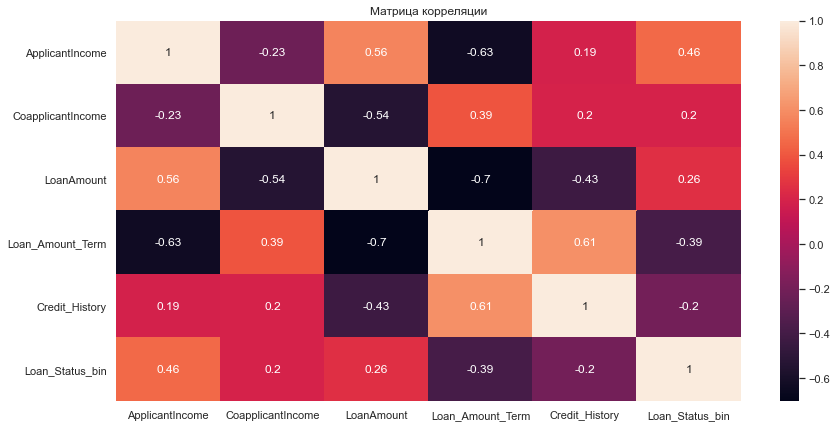

In [47]:
plt.figure(figsize=(14,7))
sns.heatmap(df_ai.corr(),annot=True)
plt.title('Матрица корреляции');

**Now the matrix has changed and ApplicantIncome has the highest correlation coefficient, which is quite logical**

**To study the effect of ApplicantIncome on the target variable across all data, let's group the values**

In [48]:
df['ApplicantIncome_group'] = pd.cut(df['ApplicantIncome'],[0, 2900, 3900, 5800, 100000])

In [49]:
df.groupby('ApplicantIncome_group')['Loan_Status_bin'].agg(['count','mean'])

,count,mean
ApplicantIncome_group,,
"(0, 2900]",159,0.691824
"(2900, 3900]",162,0.697531
"(3900, 5800]",140,0.678571
"(5800, 100000]",153,0.679739


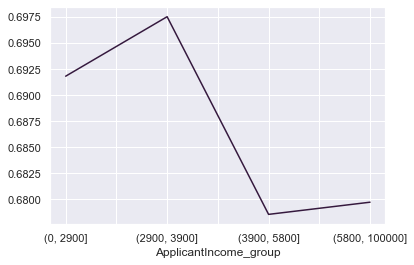

In [50]:
df.groupby('ApplicantIncome_group')['Loan_Status_bin'].mean().plot(grid=True);

**Conclusions:**
1. There is no direct dependence of the target variable on the indicator ApplicantIncome.
2. It is necessary to analyze the influence of this indicator on the target variable in conjunction with the Loan Amount indicator.

<a id='task3.6'></a>

**Co-applicant Income**

In [51]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

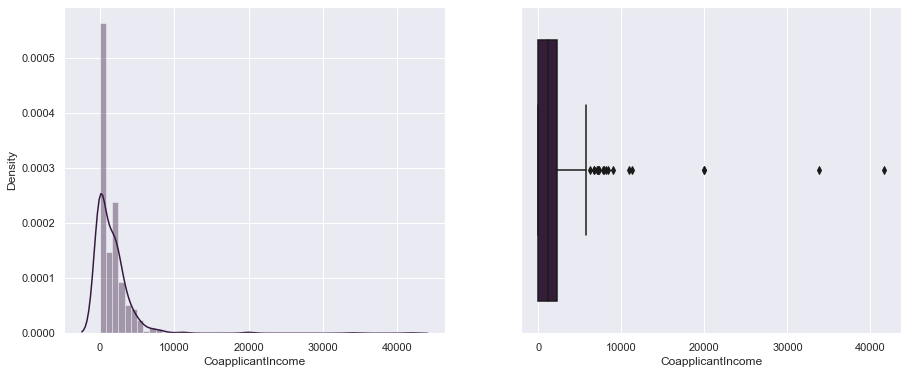

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.distplot(df['CoapplicantIncome'], bins=50, ax=ax[0])
sns.boxplot(df['CoapplicantIncome'], ax=ax[1]);

**There are problems with the distribution, so when preparing the data for modeling, it will be necessary to transform the data using a logarithm**

**Let's study the data in the segment, where CoapplicantIncome > 15000**

In [53]:
df_cai = df[df['CoapplicantIncome'] > 15000]
df_cai

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_bin,ApplicantIncome_group
402,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y,1,"(0, 2900]"
417,Male,Yes,2,Graduate,Yes,1600,20000.0,239.0,360.0,1.0,Urban,N,0,"(0, 2900]"
581,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N,0,"(0, 2900]"
600,Female,No,3+,Graduate,No,416,41667.0,350.0,180.0,1.0,Urban,N,0,"(0, 2900]"


**Most likely, the outliers here are due to data errors, because with ApplicantIncome equal to 2500, the CoapplicantIncome indicator of 20000 looks like a dimensional error, so such outliers should be removed.**

**To study the effect of CoapplicantIncome on the target variable across all data, let's group the values**

In [54]:
df['CoapplicantIncome_group'] = pd.cut(df['CoapplicantIncome'],[-0.0001, 1200.000, 2300.000, 42000.000])

In [55]:
df.groupby('CoapplicantIncome_group')['Loan_Status_bin'].agg(['count','mean'])

,count,mean
CoapplicantIncome_group,,
"(-0.0001, 1200.0]",307,0.677524
"(1200.0, 2300.0]",153,0.705882
"(2300.0, 42000.0]",154,0.688312


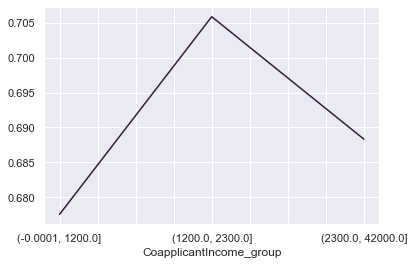

In [56]:
df.groupby('CoapplicantIncome_group')['Loan_Status_bin'].mean().plot(grid=True);

**Conclusions:**
1. There is no direct dependence of the target variable on the indicator CoapplicantIncome.
2. It is necessary to analyze the influence of this indicator on the target variable in conjunction with the Loan Amount indicator.

<a id='task3.7'></a>

**Loan Amount**

In [57]:
df["LoanAmount"].describe()

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

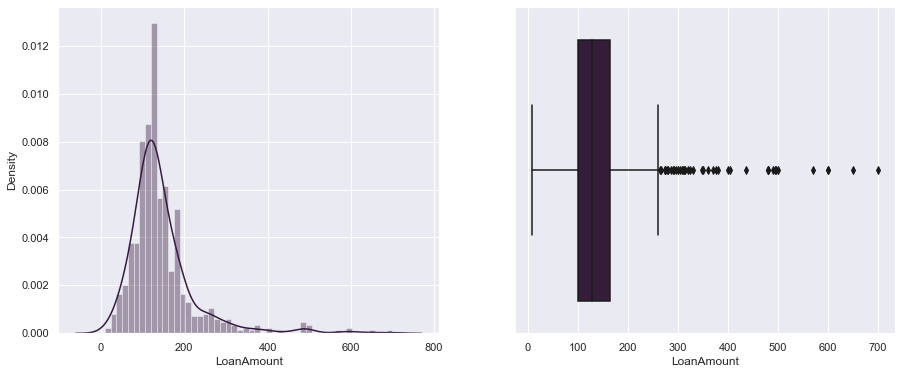

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.distplot(df['LoanAmount'], bins=50, ax=ax[0])
sns.boxplot(df['LoanAmount'], ax=ax[1]);

**There are problems with the distribution, so when preparing the data for modeling, it will be necessary to transform the data using a logarithm**

**Let's study the data in the segment, where LoanAmount > 400**

In [59]:
df_la = df[df['LoanAmount'] > 400]
df_la.sort_values('LoanAmount', ascending=False)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_bin,ApplicantIncome_group,CoapplicantIncome_group
171,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y,1,"(5800, 100000]","(-0.0001, 1200.0]"
130,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,1.0,Urban,Y,1,"(5800, 100000]","(-0.0001, 1200.0]"
155,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y,1,"(5800, 100000]","(-0.0001, 1200.0]"
561,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y,1,"(5800, 100000]","(-0.0001, 1200.0]"
369,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N,0,"(5800, 100000]","(2300.0, 42000.0]"
487,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N,0,"(5800, 100000]","(-0.0001, 1200.0]"
604,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y,1,"(5800, 100000]","(-0.0001, 1200.0]"
177,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N,0,"(3900, 5800]","(2300.0, 42000.0]"
333,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y,1,"(5800, 100000]","(-0.0001, 1200.0]"
308,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,N,0,"(5800, 100000]","(-0.0001, 1200.0]"


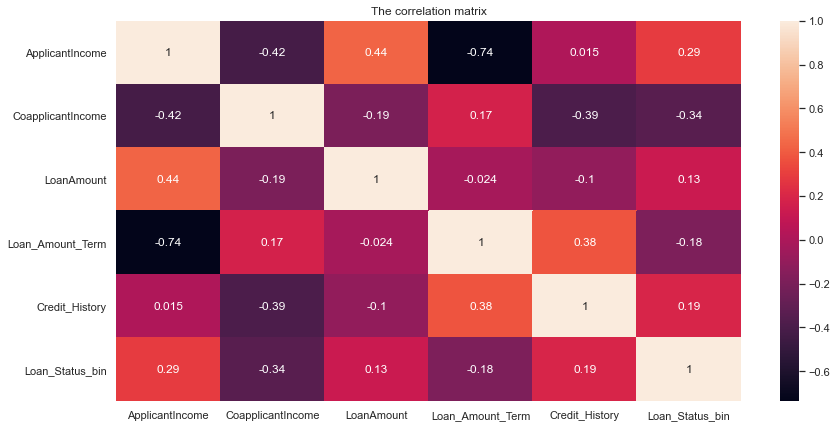

In [61]:
plt.figure(figsize=(14,7))
sns.heatmap(df_la.corr(),annot=True)
plt.title('The correlation matrix');

**The data and the correlation matrix do not look logical, because the higher the income of the co-applicant, the lower the chance of obtaining a loan - most likely these are some very individual cases or errors in the data, i.e. such outliers should be removed.**

**To study the effect of LoanAmount on the target variable, let's group the values**

In [62]:
df['LoanAmount_group'] = pd.cut(df['LoanAmount'],[9, 100, 130, 165, 700])

In [63]:
df.groupby('LoanAmount_group')['Loan_Status_bin'].agg(['count','mean'])

,count,mean
LoanAmount_group,,
"(9, 100]",153,0.699346
"(100, 130]",186,0.704301
"(130, 165]",123,0.699187
"(165, 700]",151,0.649007


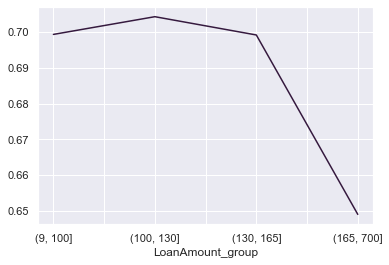

In [64]:
df.groupby('LoanAmount_group')['Loan_Status_bin'].mean().plot(grid=True);

In [65]:
df.groupby(['LoanAmount_group','CoapplicantIncome_group'])['Loan_Status_bin'].agg(['count','mean'])

count      mean
LoanAmount_group CoapplicantIncome_group                 
(9, 100]         (-0.0001, 1200.0]          104  0.653846
                 (1200.0, 2300.0]            34  0.823529
                 (2300.0, 42000.0]           15  0.733333
(100, 130]       (-0.0001, 1200.0]           87  0.701149
                 (1200.0, 2300.0]            62  0.693548
                 (2300.0, 42000.0]           37  0.729730
(130, 165]       (-0.0001, 1200.0]           47  0.638298
                 (1200.0, 2300.0]            34  0.705882
                 (2300.0, 42000.0]           42  0.761905
(165, 700]       (-0.0001, 1200.0]           68  0.720588
                 (1200.0, 2300.0]            23  0.565217
                 (2300.0, 42000.0]           60  0.600000

In [66]:
df.groupby(['LoanAmount_group','ApplicantIncome_group'])['Loan_Status_bin'].agg(['count','mean'])

count      mean
LoanAmount_group ApplicantIncome_group                 
(9, 100]         (0, 2900]                 65  0.723077
                 (2900, 3900]              56  0.678571
                 (3900, 5800]              24  0.625000
                 (5800, 100000]             8  0.875000
(100, 130]       (0, 2900]                 55  0.727273
                 (2900, 3900]              54  0.740741
                 (3900, 5800]              50  0.680000
                 (5800, 100000]            27  0.629630
(130, 165]       (0, 2900]                 23  0.695652
                 (2900, 3900]              37  0.702703
                 (3900, 5800]              38  0.710526
                 (5800, 100000]            25  0.680000
(165, 700]       (0, 2900]                 15  0.466667
                 (2900, 3900]              15  0.600000
                 (3900, 5800]              28  0.678571
                 (5800, 100000]            93  0.677419

**Conclusions:**
1. With requested amounts above 165,000, 65% of applicants received a loan, while with amounts less than 165,000 - about 70%, i.e. the chance to get a loan is 5% higher if the requested amount is less than $165,000.
2. The impact of CoapplicantIncome on the target variable in conjunction with the Loan Amount indicator can be assessed as follows - with a loan amount of up to 100 thousand, people whose co-applicants have an income of 1200 to 2300 have the best chance of getting a loan, 82%,
with a loan amount of up to 130 thousand, the best chance is 73% with an income of co-applicants from 2300 and
with a loan amount of up to 165 thousand, the best chance is 76% with an income of co-applicants from 2300.
3. The impact of ApplicantIncome on the target variable in conjunction with the Loan Amount indicator can be estimated as follows -
with a loan amount of up to 100 thousand, people with an income of 5800 or more have the best chance of getting a loan (88%);
with a loan amount of up to 130 thousand, the best chance is 74% with income from 2900 to 3900,
with a loan amount of up to 165 thousand, the best chance is 71% with income from 3900 to 5800 and
with a loan of up to 700 thousand, the best chance is 68% with an income of 5800 to 100,000.

<a id='task3.8'></a>

**Loan Amount Term**

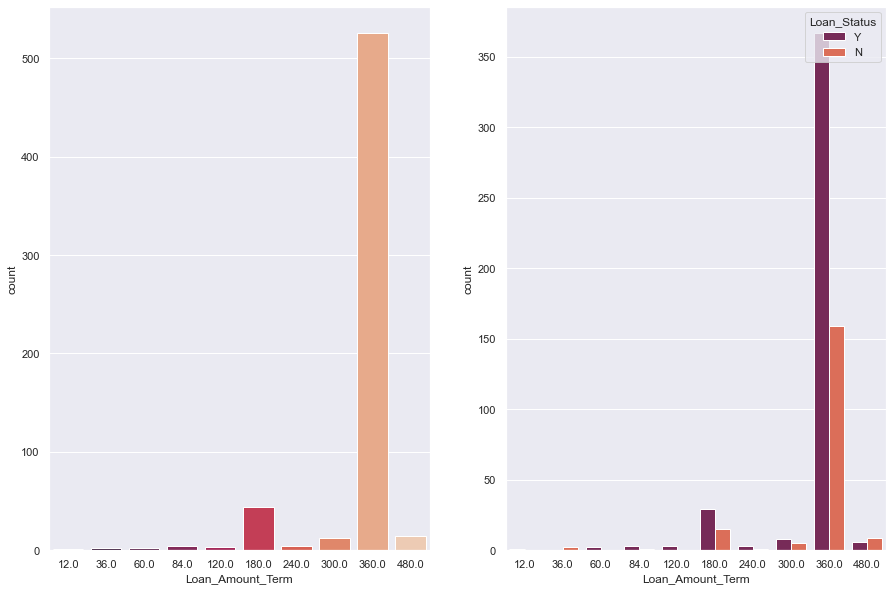

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
sns.countplot(df['Loan_Amount_Term'], palette="rocket", ax=ax[0])
sns.countplot(df['Loan_Amount_Term'], hue=df['Loan_Status'], palette="rocket", ax=ax[1]);

In [68]:
pd.DataFrame(df['Loan_Amount_Term'].value_counts())

,Loan_Amount_Term
360.0,526
180.0,44
480.0,15
300.0,13
84.0,4
240.0,4
120.0,3
36.0,2
60.0,2
12.0,1


**To study the influence of this feature on the target variable, let's group the Loan_Amount_Term values into three groups according to the principle - to the median, the median value and from the median to the maximum**

In [69]:
df['Loan_Amount_Term_group'] = pd.cut(df['Loan_Amount_Term'],[0, 350, 370, 480])

In [70]:
df.groupby('Loan_Amount_Term_group')['Loan_Status_bin'].agg(['count','mean'])

,count,mean
Loan_Amount_Term_group,,
"(0, 350]",73,0.671233
"(350, 370]",526,0.697719
"(370, 480]",15,0.400000


In [71]:
df.groupby(['Loan_Amount_Term_group'])[['Loan_Status_bin']].agg(['count','mean'])

Loan_Status_bin          
                                 count      mean
Loan_Amount_Term_group                          
(0, 350]                            73  0.671233
(350, 370]                         526  0.697719
(370, 480]                          15  0.400000

In [72]:
pd.DataFrame(df.groupby(['Loan_Amount_Term_group'])['Loan_Status'].value_counts())

Loan_Status
Loan_Amount_Term_group Loan_Status             
(0, 350]               Y                     49
                       N                     24
(350, 370]             Y                    367
                       N                    159
(370, 480]             N                      9
                       Y                      6

**Conclusions:**
1. With terms up to 360 months inclusive, 67% - 49 applicants received a loan, with a period of 360 months 70% of applicants - 367 people received a loan. and with a period of 480 months, only 40% of applicants received a loan - 6 people.
3. Thus, with the requested period of up to 360 months. inclusive, the chance to get a loan is 30% higher.

<a id='task3.9'></a>

**Credit History (1-Yes, 0-No)**


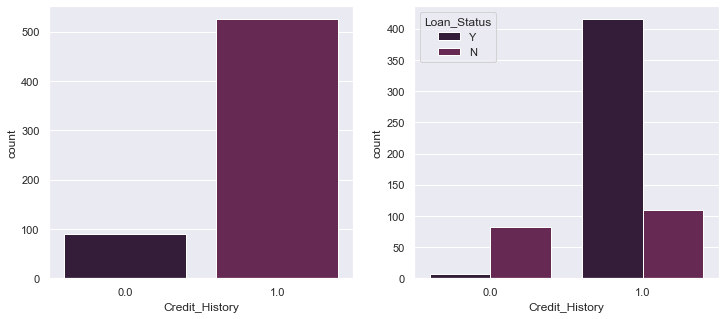

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(df['Credit_History'], ax=ax[0])
sns.countplot(df['Credit_History'], hue=df['Loan_Status'], ax=ax[1]);

In [74]:
pd.DataFrame(round(df['Credit_History'].value_counts(normalize=True)*100))

,Credit_History
1.0,86.0
0.0,14.0


In [75]:
df.groupby(['Credit_History'])[['Loan_Status_bin']].agg(['count','mean'])

Loan_Status_bin          
                         count      mean
Credit_History                          
0.0                         89  0.078652
1.0                        525  0.790476

In [76]:
pd.DataFrame(df.groupby(['Credit_History'])['Loan_Status'].value_counts())

Loan_Status
Credit_History Loan_Status             
0.0            N                     82
               Y                      7
1.0            Y                    415
               N                    110

**Conclusions:**
1. 525 applicants - 86% have a credit history and 89 - 14% do not.
2. 415 applicants with a credit history - 79% and 7 applicants without a credit history - 8% received a loan.
3. The difference is 71%, which indicates that the influence of this factor on the target variable is huge, i.e. the chance of obtaining a loan is 71% higher if the applicant has a suitable credit history.

<a id='task3.10'></a>

**Property Area**

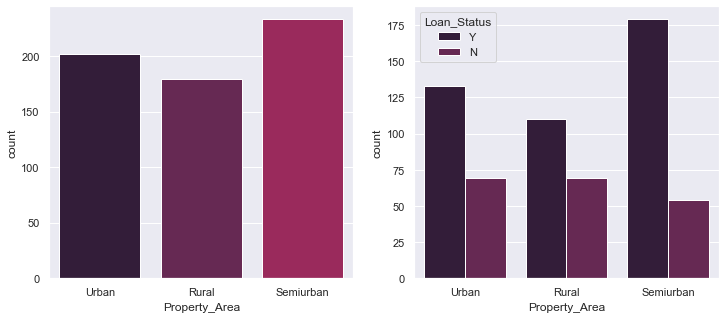

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(df['Property_Area'], ax=ax[0])
sns.countplot(df['Property_Area'], hue=df['Loan_Status'], ax=ax[1]);

In [78]:
pd.DataFrame(round(df['Property_Area'].value_counts(normalize=True)*100))

,Property_Area
Semiurban,38.0
Urban,33.0
Rural,29.0


In [79]:
df.groupby(['Property_Area'])[['Loan_Status_bin']].agg(['count','mean'])

Loan_Status_bin          
                        count      mean
Property_Area                          
Rural                     179  0.614525
Semiurban                 233  0.768240
Urban                     202  0.658416

In [80]:
pd.DataFrame(df.groupby('Property_Area')["Loan_Status"].value_counts())

Loan_Status
Property_Area Loan_Status             
Rural         Y                    110
              N                     69
Semiurban     Y                    179
              N                     54
Urban         Y                    133
              N                     69

**Conclusions:**
1. 233 applicants have housing in semiurban areas - 38%, 202 in urban areas - 33% and 179 - 329% in rural areas.
2. 179 applicants with housing in semiurban areas - 77%, 133 in urban areas - 66% and 110 in rural areas - 61% received a loan.
3. The difference between the categories is up to 16%, which indicates that there is an influence of this factor on the target variable, i.e. the chance of obtaining a loan is 16% higher if the applicant has housing in a semiurban area.

<a id='task3.11'></a>

**Tests**

**Let's see in one picture how different features in the data set are related**

In [81]:
df_ready = df.drop(['Loan_Status','ApplicantIncome_group','CoapplicantIncome_group', 'LoanAmount_group','Loan_Amount_Term_group'], axis=1 )

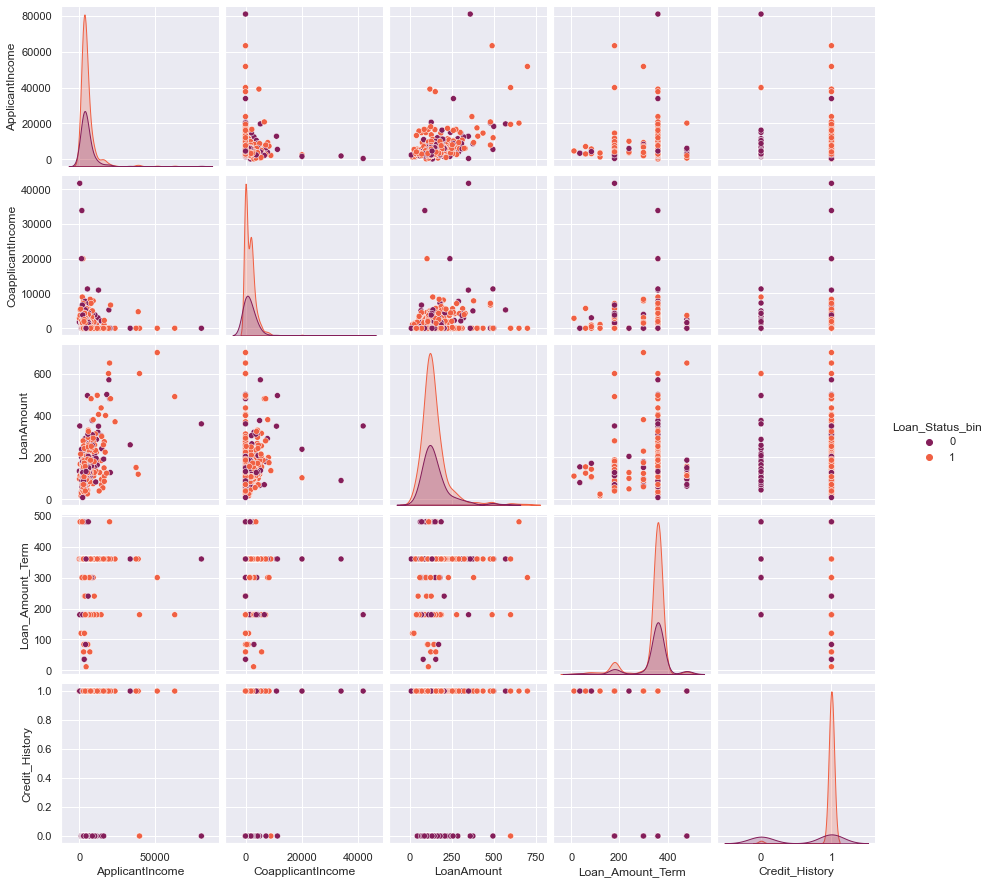

In [82]:
sns.pairplot(df_ready, hue = 'Loan_Status_bin', palette="rocket");

**Now let's see what features the target variable correlates with, for this we recode the categorical features**

In [83]:
def object_col(df):
    return [x for x in df.columns if df[x].dtype == "object"]

def one_hot_encoding(df, columns):
    return pd.get_dummies(df, columns=columns)

cat_cols = object_col(df_ready)
df_encod = one_hot_encoding(df_ready, cat_cols)

In [84]:
df_ready.Gender.replace({'Male': 1, 'Female': 0}, inplace = True)
df_ready.Married.replace({'Yes': 1, 'No': 0}, inplace = True)
df_ready.Education.replace({'Graduate': 1, 'Not Graduate': 0}, inplace = True)
df_ready.Self_Employed.replace({'Yes': 1, 'No': 0}, inplace = True)
df_ready.Dependents.replace({'0':0,'1':1,'2':2,'3+':3}, inplace = True)
df_ready.Property_Area.replace({'Urban':2,'Rural':0,'Semiurban':1}, inplace = True)

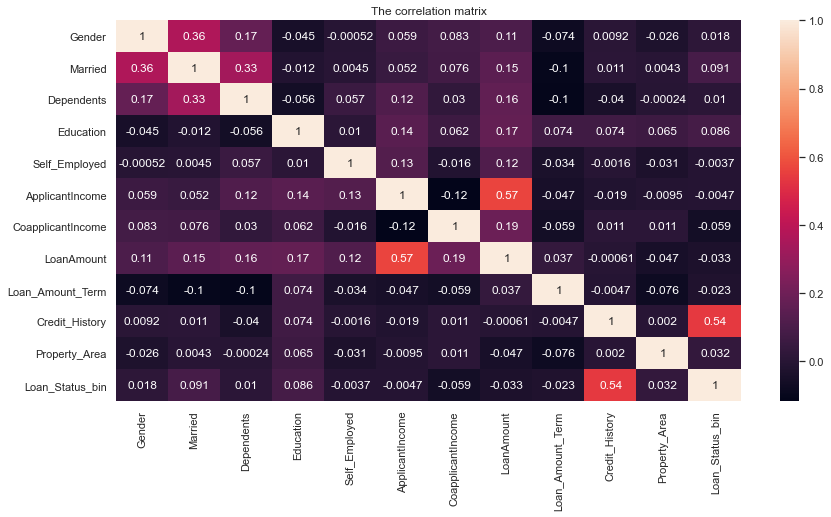

In [86]:
plt.figure(figsize=(14,7))
sns.heatmap(df_ready.corr(),annot=True)
plt.title('The correlation matrix');

**There is a correlation between the loan amount and the applicant's income**

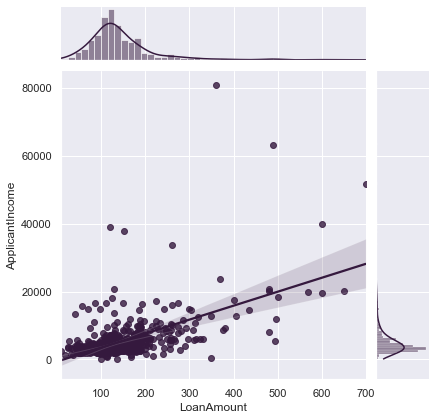

In [87]:
sns.jointplot(df_ready['LoanAmount'], df_ready['ApplicantIncome'], kind="reg");

**Conclusions:**
1. An applicant asking for a large loan amount but having a low income will find it difficult to obtain a loan, for example, (250, 35000) and (350, 80000).
2. An applicant requesting a small loan amount but having a relatively high income will easily get a loan, for example, (120, 40000) and (150, 39000)

<a id='task4'></a>

### Preprocessing

**Removing outliers**

In [92]:
df_no_outl = df_ready.copy()
df_no_outl.shape

(614, 12)

In [93]:
df_no_outl.drop(df_no_outl[df_no_outl['ApplicantIncome'] > 81000].index, axis=0, inplace=True)

In [94]:
df_no_outl.drop(df_no_outl[df_no_outl['CoapplicantIncome'] > 15000].index, axis=0, inplace=True)

In [95]:
df_no_outl.drop(df_no_outl[df_no_outl['LoanAmount'] > 400].index, axis=0, inplace=True)

In [96]:
df_no_outl.reset_index(drop=True, inplace=True)
df_no_outl.shape

(596, 12)

**Transforming data to a normal distribution**

In [97]:
df_no_outl['ApplicantIncome'] = np.log(df_no_outl['ApplicantIncome'])
df_no_outl['CoapplicantIncome'] = [np.log(i) if i!=0 else 0 for i in df_no_outl['CoapplicantIncome']]
df_no_outl['LoanAmount'] = np.log(df_no_outl['LoanAmount'])

In [98]:
df_no_outl.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_bin
0,1,0,0,1,0,8.674026,0.000000,4.852030,360.0,1.0,2,1
1,1,1,1,1,0,8.430109,7.318540,4.852030,360.0,1.0,0,0
2,1,1,0,1,1,8.006368,0.000000,4.189655,360.0,1.0,2,1
3,1,1,0,0,0,7.856707,7.765569,4.787492,360.0,1.0,2,1
4,1,0,0,1,0,8.699515,0.000000,4.948760,360.0,1.0,2,1


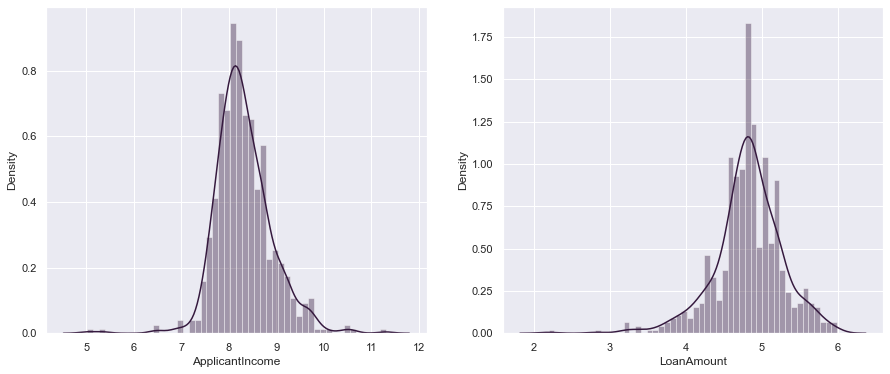

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.distplot(df_no_outl['ApplicantIncome'], bins=50, ax=ax[0])
sns.distplot(df_no_outl['LoanAmount'], bins=50, ax=ax[1]);

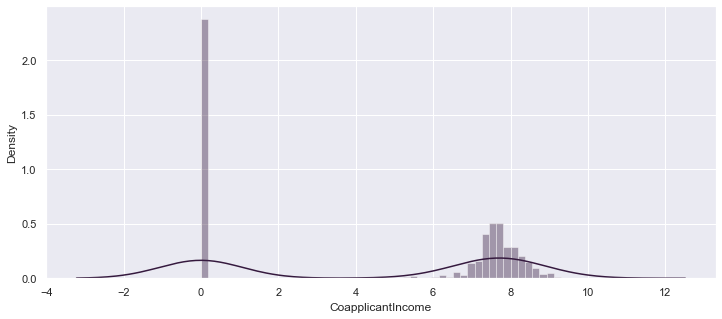

In [100]:
plt.figure(figsize=(12,5))
sns.distplot(df_no_outl['CoapplicantIncome'], bins=50);

<a id='task5'></a>

### Model

In [101]:
X = df_no_outl.drop(columns=['Loan_Status_bin'], axis=1)
y = df_no_outl['Loan_Status_bin']

**split the sample into training and test**

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Data Standardization/Normalization**

Data standardization is done with the Standard-Scaler, which scales the data so that the mean of the observed data is 0 and the standard deviation is 1.

In [103]:
StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

**Creating a logistic regression model and a decision tree and calculating the accuracy - the ratio of correct predictions to the total number of positions**

In [104]:
Model_1 = LogisticRegression()
Model_1.fit(X_train,y_train)
y_pred = Model_1.predict(X_test)
print(classification_report(y_pred,y_test))
print('Logistic Regression:',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.45      0.95      0.61        20
           1       0.99      0.82      0.90       129

    accuracy                           0.84       149
   macro avg       0.72      0.89      0.76       149
weighted avg       0.92      0.84      0.86       149

Logistic Regression: 0.8389261744966443


In [105]:
Model_2 = DecisionTreeClassifier()
Model_2.fit(X_train,y_train)
y_pred = Model_2.predict(X_test)
print(classification_report(y_pred,y_test))
print('DecisionTreeClassifier:',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.60      0.54      0.57        46
           1       0.80      0.83      0.82       103

    accuracy                           0.74       149
   macro avg       0.70      0.69      0.69       149
weighted avg       0.74      0.74      0.74       149

DecisionTreeClassifier: 0.7449664429530202


In [106]:
df_fi_Model_1 = pd.DataFrame({'feature_names':list(X.columns),'feature_importance':np.abs(Model_1.coef_[0])})\
                            .sort_values(by=['feature_importance'], ascending=False)

<a id='task6'></a>

In [107]:
df_fi_Model_2 = pd.DataFrame({'feature_names':list(X.columns),'feature_importance':Model_2.feature_importances_})\
                            .sort_values(by=['feature_importance'], ascending=False)

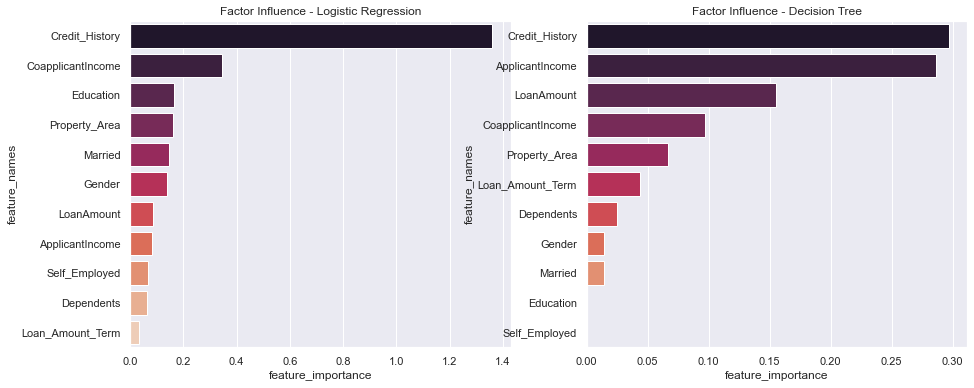

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.barplot(x=df_fi_Model_1['feature_importance'], y=df_fi_Model_1['feature_names'], ax=ax[0], palette="rocket").set_title('Factor Influence - Logistic Regression')
sns.barplot(x=df_fi_Model_2['feature_importance'], y=df_fi_Model_2['feature_names'], ax=ax[1], palette="rocket").set_title('Factor Influence - Decision Tree');

**Conclusions:**  
Based on two models for solving the classification problem, the top 3 most factors that have the greatest influence on the target variable were determined:
- Having a credit history,
- Income of co-borrowers,
- Loan amount.
   All these factors are related to income and credit conditions.

<a id='task6'></a>

### 7. Conclusions

Top 5 factors influencing the target variable coincided with the conclusions of manual analysis and Logistic Regression model:  
- Having a credit history,
- Income of the co-borrower;
- Housing in a suburban area;
- Higher education;
- Loan amount.
   Two of these factors are socio-demographic factors, so it can be said that the influence of socio-demographic factors cannot be completely rejected despite the results of the simulations.






